<a href="https://colab.research.google.com/github/gffiveash/DS4002-Project-3/blob/main/2_Merging_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##This notebook merges our 3 datasets: 1) the JPG folder of 800+ flowers 2) image ID and index and 3) index and flower name. This produced our final dataset.

In [ ]:
! git clone https://github.com/gffiveash/DS4002-Project-3

Cloning into 'DS4002-Project-3'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 32 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (32/32), 23.06 KiB | 7.68 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [ ]:
# Reading the tgz file

import tarfile

with tarfile.open('/content/102flowers.tgz') as file:
    file.extractall()

In [ ]:
# Importing necessary packages

import pandas as pd
import os
from PIL import Image
import numpy as np

In [ ]:
# Reading the JPG files (individual flowers) in our jpg folder

folder_path = '/content/jpg'
image_data = []

for filename in sorted(os.listdir(folder_path)):
    if filename.lower().endswith('.jpg'):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path).convert('RGB')
        image_data.append({
            'filename': filename,
            'path': img_path,
            'image': np.array(img)})

In [ ]:
# Creating a dataframe of filename, filepath, and the image itself

df = pd.DataFrame(image_data)
print(df.head())

          filename                          path  \
0  image_00001.jpg  /content/jpg/image_00001.jpg   
1  image_00002.jpg  /content/jpg/image_00002.jpg   
2  image_00003.jpg  /content/jpg/image_00003.jpg   
3  image_00004.jpg  /content/jpg/image_00004.jpg   
4  image_00005.jpg  /content/jpg/image_00005.jpg   

                                               image  
0  [[[126, 120, 96], [124, 118, 94], [121, 115, 9...  
1  [[[2, 62, 28], [3, 63, 29], [5, 66, 32], [7, 6...  
2  [[[2, 2, 0], [2, 2, 0], [2, 2, 0], [2, 2, 0], ...  
3  [[[169, 189, 180], [169, 189, 180], [169, 189,...  
4  [[[43, 52, 35], [44, 53, 36], [42, 53, 36], [4...  


array([[[ 2, 62, 28],
        [ 3, 63, 29],
        [ 5, 66, 32],
        ...,
        [ 4, 49, 28],
        [ 7, 55, 33],
        [15, 67, 44]],

       [[ 2, 63, 30],
        [ 3, 64, 30],
        [ 2, 66, 32],
        ...,
        [ 4, 49, 28],
        [ 7, 55, 33],
        [16, 68, 45]],

       [[ 2, 69, 36],
        [ 2, 69, 34],
        [ 2, 69, 36],
        ...,
        [ 4, 49, 28],
        [ 7, 55, 33],
        [18, 68, 43]],

       ...,

       [[31, 48,  0],
        [29, 48,  0],
        [27, 45,  0],
        ...,
        [11, 20, 37],
        [10, 19, 34],
        [ 7, 21, 32]],

       [[47, 64,  9],
        [43, 62,  7],
        [39, 57,  7],
        ...,
        [11, 20, 37],
        [10, 19, 34],
        [ 7, 21, 32]],

       [[61, 78, 23],
        [55, 74, 19],
        [49, 67, 17],
        ...,
        [11, 20, 37],
        [11, 20, 35],
        [ 8, 22, 33]]], dtype=uint8)
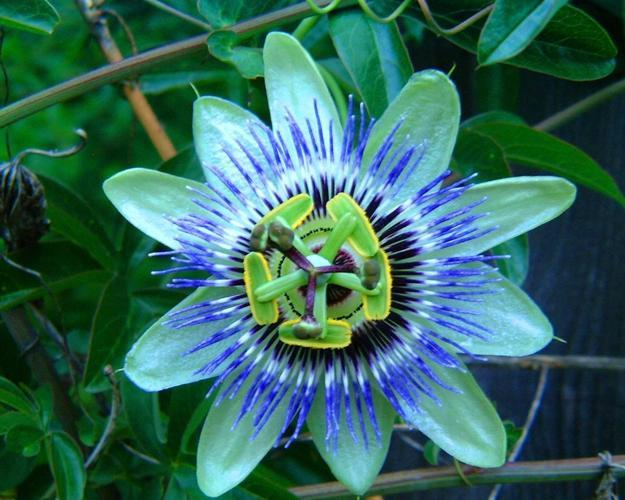

In [ ]:
# Testing image

df['image'].iloc[1]

In [ ]:
# Reading our 2 additional CSVs

df1=pd.read_csv('DS4002-Project-3/DATA/Original Data/Image ID and Index.csv')
df2=pd.read_csv('DS4002-Project-3/DATA/Original Data/Oxford Flower Index and Name.csv')

In [ ]:
# Looking at columns to determine whether to merge or concat

print(df.columns)
print(df1.columns)

Index(['filename', 'path', 'image'], dtype='object')
Index(['Image_id', 'Index'], dtype='object')


In [ ]:
# Concatenating our image dataset with a dataset containing Image ID and the index number

df_combined = pd.concat([df.reset_index(drop=True), df1.reset_index(drop=True)], axis=1)

In [ ]:
df_combined.head(10)

,filename,path,image,Image_id,Index
0,image_00001.jpg,/content/jpg/image_00001.jpg,"[[[126, 120, 96], [124, 118, 94], [121, 115, 9...",1,77
1,image_00002.jpg,/content/jpg/image_00002.jpg,"[[[2, 62, 28], [3, 63, 29], [5, 66, 32], [7, 6...",2,77
2,image_00003.jpg,/content/jpg/image_00003.jpg,"[[[2, 2, 0], [2, 2, 0], [2, 2, 0], [2, 2, 0], ...",3,77
3,image_00004.jpg,/content/jpg/image_00004.jpg,"[[[169, 189, 180], [169, 189, 180], [169, 189,...",4,77
4,image_00005.jpg,/content/jpg/image_00005.jpg,"[[[43, 52, 35], [44, 53, 36], [42, 53, 36], [4...",5,77
5,image_00006.jpg,/content/jpg/image_00006.jpg,"[[[33, 58, 19], [31, 57, 18], [30, 56, 17], [2...",6,77
6,image_00007.jpg,/content/jpg/image_00007.jpg,"[[[90, 124, 29], [86, 120, 25], [81, 115, 20],...",7,77
7,image_00008.jpg,/content/jpg/image_00008.jpg,"[[[78, 104, 43], [75, 101, 38], [70, 96, 33], ...",8,77
8,image_00009.jpg,/content/jpg/image_00009.jpg,"[[[60, 132, 24], [58, 130, 22], [56, 128, 20],...",9,77
9,image_00010.jpg,/content/jpg/image_00010.jpg,"[[[32, 38, 26], [31, 37, 25], [30, 36, 24], [2...",10,77


In [ ]:
# Merging this combined dataset with our third dataset, which contains the flower name and index number

df_final = df_combined.merge(df2, on='Index', how='left')

In [ ]:
df_final.head()

,filename,path,image,Image_id,Index,Name
0,image_00001.jpg,/content/jpg/image_00001.jpg,"[[[126, 120, 96], [124, 118, 94], [121, 115, 9...",1,77,passion flower
1,image_00002.jpg,/content/jpg/image_00002.jpg,"[[[2, 62, 28], [3, 63, 29], [5, 66, 32], [7, 6...",2,77,passion flower
2,image_00003.jpg,/content/jpg/image_00003.jpg,"[[[2, 2, 0], [2, 2, 0], [2, 2, 0], [2, 2, 0], ...",3,77,passion flower
3,image_00004.jpg,/content/jpg/image_00004.jpg,"[[[169, 189, 180], [169, 189, 180], [169, 189,...",4,77,passion flower
4,image_00005.jpg,/content/jpg/image_00005.jpg,"[[[43, 52, 35], [44, 53, 36], [42, 53, 36], [4...",5,77,passion flower


In [ ]:
# Testing merge

print(df_final.iloc[251])

filename                                      image_00252.jpg
path                             /content/jpg/image_00252.jpg
image       [[[3, 3, 5], [2, 2, 4], [2, 2, 4], [2, 2, 4], ...
Image_id                                                  252
Index                                                      73
Name                                               water lily
Name: 251, dtype: object


array([[[ 3,  3,  5],
        [ 2,  2,  4],
        [ 2,  2,  4],
        ...,
        [19, 21, 16],
        [20, 22, 17],
        [21, 23, 18]],

       [[ 3,  3,  5],
        [ 2,  2,  4],
        [ 2,  2,  4],
        ...,
        [18, 20, 15],
        [19, 21, 16],
        [20, 22, 17]],

       [[ 3,  3,  5],
        [ 2,  2,  4],
        [ 2,  2,  4],
        ...,
        [16, 18, 15],
        [17, 19, 16],
        [17, 19, 16]],

       ...,

       [[ 6,  6,  8],
        [ 5,  5,  7],
        [ 4,  4,  6],
        ...,
        [ 6,  8,  7],
        [ 7,  9,  8],
        [ 8, 10,  9]],

       [[ 6,  6,  8],
        [ 5,  5,  7],
        [ 4,  4,  6],
        ...,
        [ 6,  8,  7],
        [ 7,  9,  8],
        [ 8, 10,  9]],

       [[ 6,  6,  8],
        [ 5,  5,  7],
        [ 4,  4,  6],
        ...,
        [ 6,  8,  7],
        [ 7,  9,  8],
        [ 8, 10,  9]]], dtype=uint8)
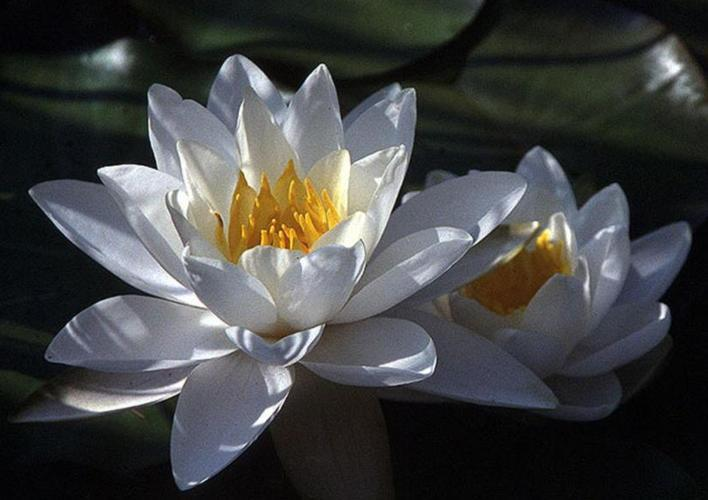

In [ ]:
df_final['image'].iloc[251]

In [ ]:
# Download the final merged CSV file

df_final.to_csv('Final_Dataset.csv',index=False)